# Track and Curtain Examples
This notebook uses concatenated data from the from the pacific hake survey to plot echograms and responding track and draped curtain. Also, this notebook show users how to switch between 2 control modes: `echogram-control` mode and `track-control` mode. 
The hake survey data has been combined with geographical coordinates.

## Significance of Track and Curtain Plotting

- `Echogram-Control` Mode: Fisheries scientists want to see on the map where the echosounder data on display as an echogram were collected, so that they can determine the fish's association with bathymetry. 

- `Track-Control` Mode: Fisheries scientist want to highlight a section of a ship track on the map and see the corresponding echogram, so that they can understand the fish and zooplankton composition at a particular geographic location. 

- Fisheries scientists want to highlight a longer section of echograms or ship track on the map and see the echogram as curtains, so that they can have a better sense of how the fish aggregation varies spatially.


- Fisheries scientists want to select a box on the track display, so that they can focus on a specific region of interest and examine the `Sv` within that area for fish analysis. Also, fisheries scientists need to export the `MVBS` dataset that is sliced by the selected box from the track, so that they can save the specific `Sv` values within that region to a separate file for further analysis or sharing with colleagues.


## Import Packages and Data 

In [2]:
import panel
import xarray as xr

import echoshader

In [3]:
from urllib import request

# Calibratd data is stored in Google Drive
url = 'https://drive.google.com/uc?export=download&id=197D0MW-bHaF6mZLcQwyr4zqyEHIfwsep'

def urllib_download():
    request.urlretrieve(url, 'concatenated_MVBS.nc')

urllib_download() 

# Load sample data for testing
MVBS_ds = xr.open_mfdataset(
    paths="concatenated_MVBS.nc",
    data_vars="minimal",
    coords="minimal",
    combine="by_coords",
)

MVBS_ds

<xarray.Dataset>
Dimensions:            (channel: 4, echo_range: 150, ping_time: 875)
Coordinates:
  * channel            (channel) object 'GPT  18 kHz 009072058c8d 1-1 ES18-11...
  * echo_range         (echo_range) float64 0.0 5.0 10.0 ... 735.0 740.0 745.0
  * ping_time          (ping_time) datetime64[ns] 2017-07-24T19:30:00 ... 201...
    time1              (ping_time) datetime64[ns] dask.array<chunksize=(875,), meta=np.ndarray>
Data variables:
    Sv                 (channel, ping_time, echo_range) float64 dask.array<chunksize=(4, 875, 150), meta=np.ndarray>
    frequency_nominal  (channel) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    longitude          (ping_time) float64 dask.array<chunksize=(875,), meta=np.ndarray>
    latitude           (ping_time) float64 dask.array<chunksize=(875,), meta=np.ndarray>
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.7.1
    processing_time:              2023-05-30T17:40:45Z
    processing_function:          commongrid.compute_MVBS

## Track Demonstration with Echogram-Control Mode

User could customize default settings of tracks.

`tile` : Map tile for the track plot. See gallery in this [ref](https://holoviews.org/reference/elements/bokeh/Tiles.html).

`control` : Control mode. Default is False, track-control mode. Set it to True to turn on echogram-control mode.

In below example with echogram-control mode, users could select specfic area on echogram then corresponding track would be shown.

Blue point represents starting points of the track. Red line represents the course of the ship. When the echo data comes from a moored platform, only one blue point would be shown.


In [20]:
eg = MVBS_ds.eshader.echogram(
        channel = ['GPT  18 kHz 009072058c8d 1-1 ES18-11',],
        cmap = "jet", 
)

track = MVBS_ds.eshader.track(
    tile = 'OSM',
    control = True,
)

panel.Column(eg, track)

BokehModel(combine_events=True, render_bundle={'docs_json': {'2c80e20b-6e83-4962-b7d5-d71d3ef82ad8': {'version…

There is just 1 control widget linked to the track.

`tile_select` : A dropdown widget to select the map tile. See more in [ref](https://holoviews.org/reference/elements/bokeh/Tiles.html).

In [6]:
tile_select = MVBS_ds.eshader.tile_select

track_panel = panel.Row(
    MVBS_ds.eshader.tile_select,
    track,
)

track_panel

BokehModel(combine_events=True, render_bundle={'docs_json': {'468a4443-4592-4aac-ad84-de6429c13f7a': {'version…

## Track Demonstration with Track-Control Mode

User could set `control` parameter when initiating the track or select control mode widgets to toggle between echogram-control mode and track-control mode.

In [22]:
control_mode_select = MVBS_ds.eshader.control_mode_select

track_with_track_mode = MVBS_ds.eshader.track(
    tile = 'OSM',
    control = False,
)

eg_with_track_mode = MVBS_ds.eshader.echogram(
    channel = ['GPT  38 kHz 009072058146 2-1 ES38B',],
    cmap = "jet", 
)

track_panel_with_track_mode = panel.Column(
    control_mode_select,
    track_with_track_mode,
    eg_with_track_mode,
)

track_panel_with_track_mode

BokehModel(combine_events=True, render_bundle={'docs_json': {'05871ba9-e1a0-46a0-bbf8-e64f29491123': {'version…

## Box Select

Under `track-control mode`, users could use `Box Select` in tool bar to select a box area from the track map and get the corresponding dataset.

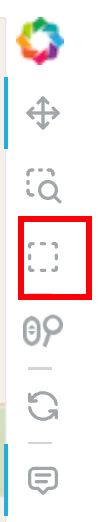

Use `Reset Button` to erase selected box and reset the box select. 

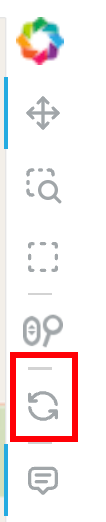

In [ ]:
data_from_box_select = MVBS_ds.eshader.get_data_from_box()

## Curtain Demonstration